In [1]:
pip install pandas matplotlib seaborn numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = sns.load_dataset('titanic')

# Display first 5 rows
print(df.head())

# Basic info (data types, missing values)
print(df.info())

# Summary statistics
print(df.describe())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


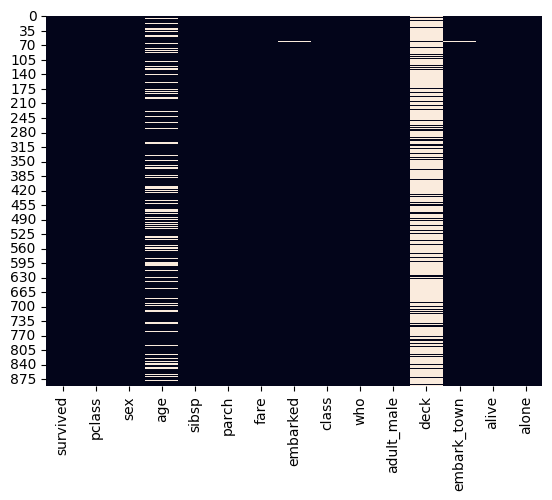

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8884\3425676033.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)  # Fill missing age with median


In [3]:
# Check missing values
print(df.isnull().sum())

# Visualize missing data (optional)
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# Handle missing data (example: fill or drop)
df['age'].fillna(df['age'].median(), inplace=True)  # Fill missing age with median
df.dropna(subset=['embarked'], inplace=True)  # Drop rows with missing 'embarked'

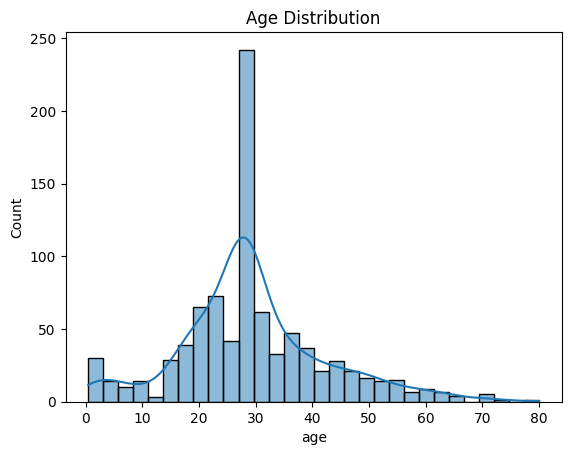

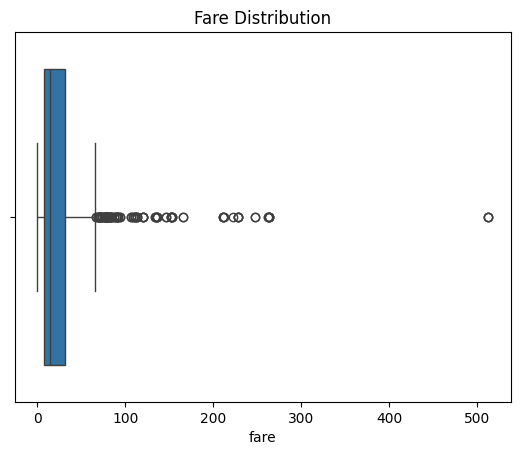

In [4]:
# Age distribution
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Fare distribution (with outliers)
sns.boxplot(x=df['fare'])
plt.title('Fare Distribution')
plt.show()

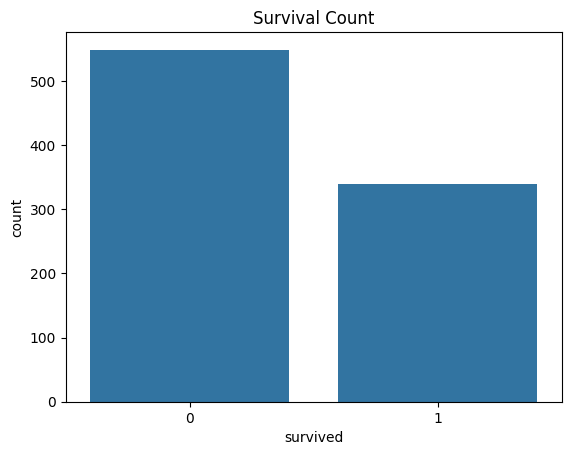

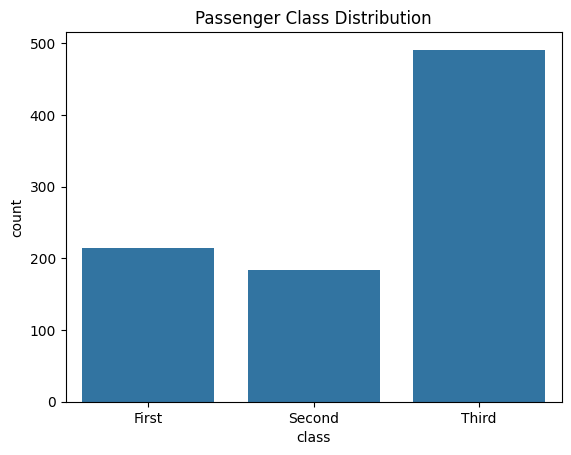

In [5]:
# Count of survivors
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# Count by passenger class
sns.countplot(x='class', data=df)
plt.title('Passenger Class Distribution')
plt.show()

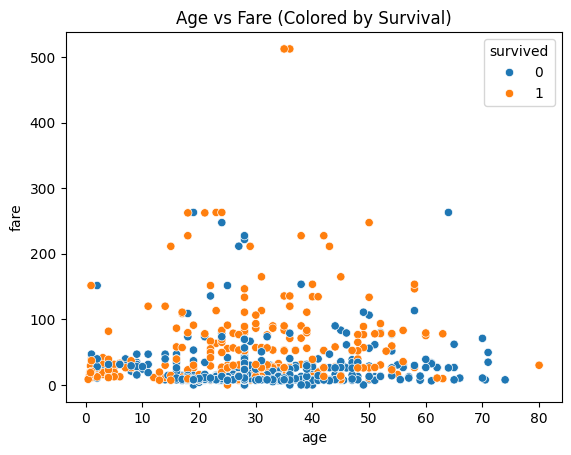

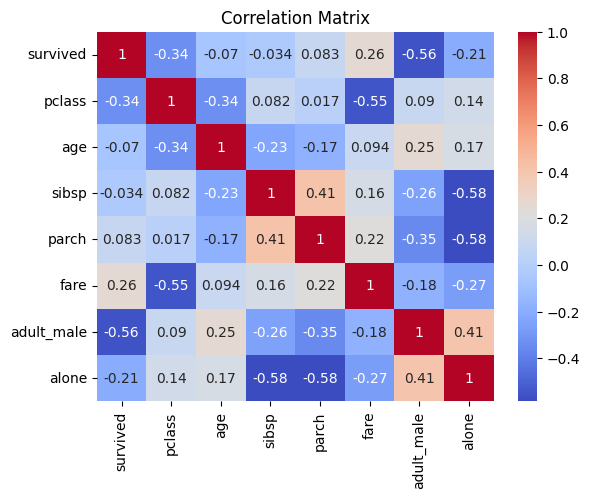

In [6]:
# Scatter plot: Age vs Fare
sns.scatterplot(x='age', y='fare', data=df, hue='survived')
plt.title('Age vs Fare (Colored by Survival)')
plt.show()

# Correlation heatmap
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

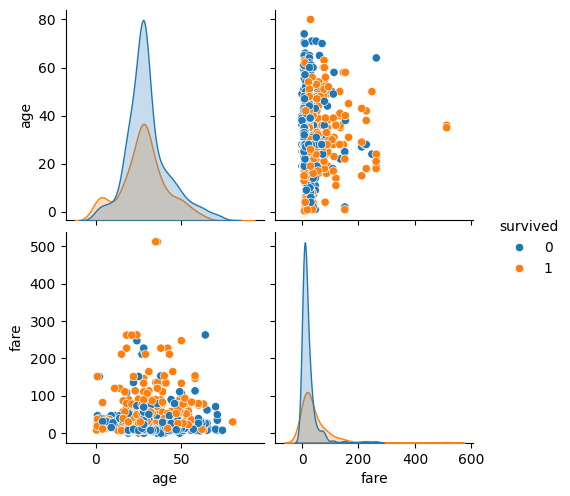

In [7]:
sns.pairplot(df[['age', 'fare', 'survived']], hue='survived')
plt.show()

In [8]:
pd.pivot_table(df, index='sex', columns='class', values='survived', aggfunc='mean')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8884\1138721322.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pd.pivot_table(df, index='sex', columns='class', values='survived', aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447
